In [ ]:
import pandas as pd

In [ ]:
file_name = "heart.csv"
df = pd.read_csv(file_name)
print(df.head())

   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1  


In [ ]:
print("Информация о данных\n")
df.info()

Информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
print("Основные статистические характеристики\n\n", df.describe())

Основные статистические характеристики

               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340  

In [ ]:
print("Размер данных\n\n", df.shape)

Размер данных

 (303, 14)


In [ ]:
missing_values = df.isna().sum()
print("Пропущенные значения по столбцам\n")
print(missing_values)

Пропущенные значения по столбцам

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt

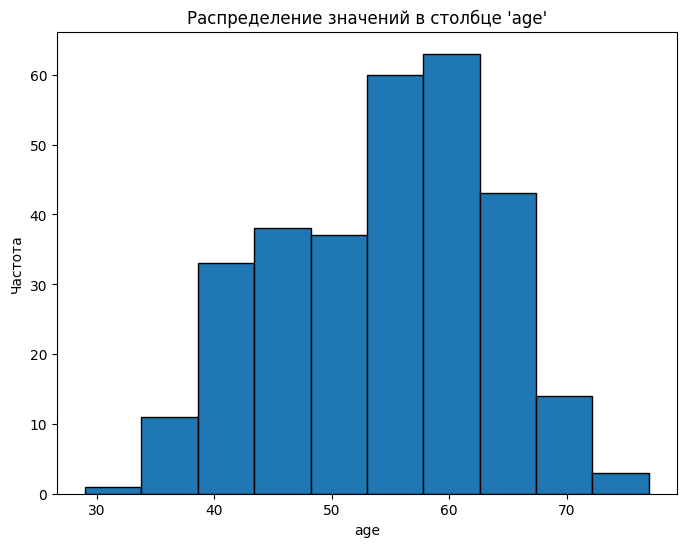

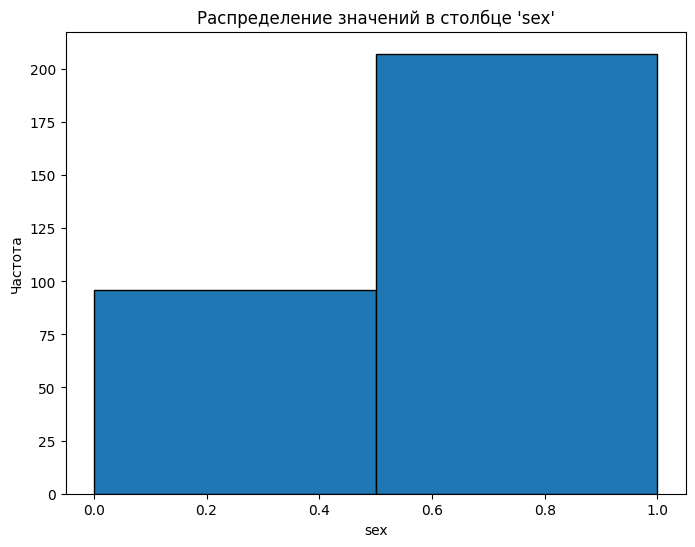

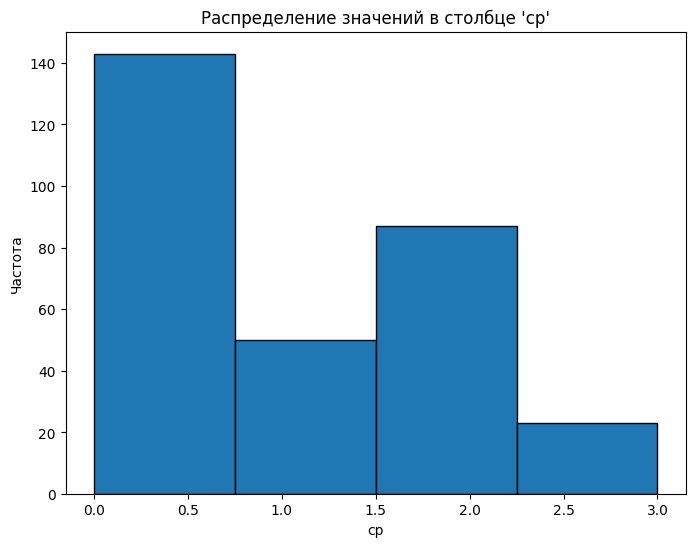

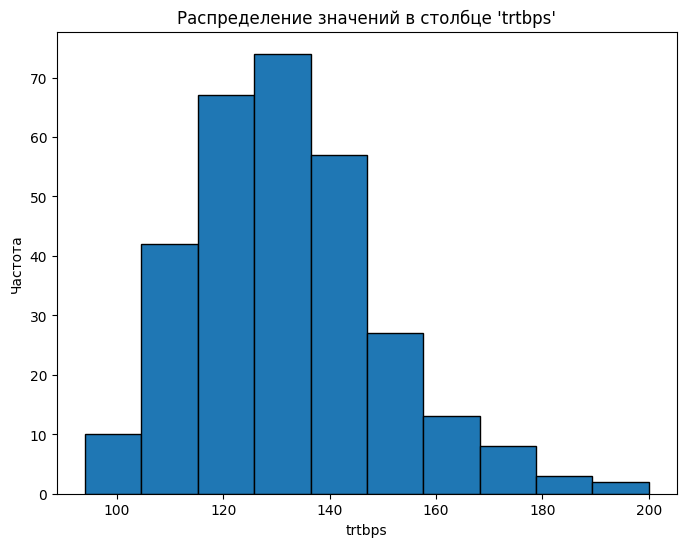

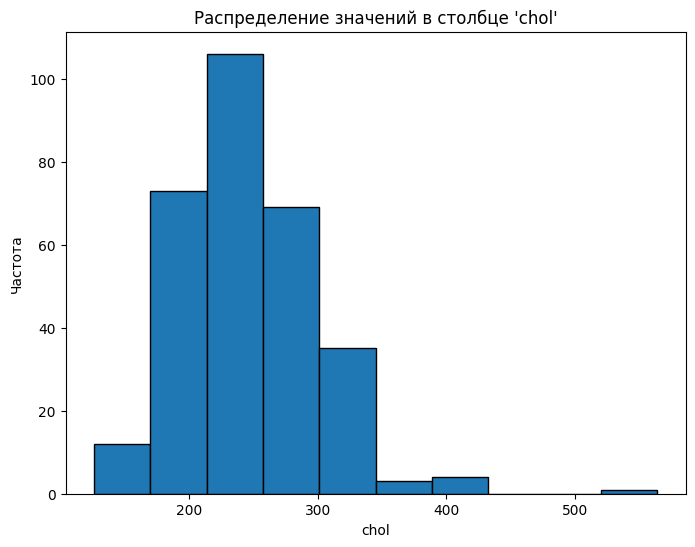

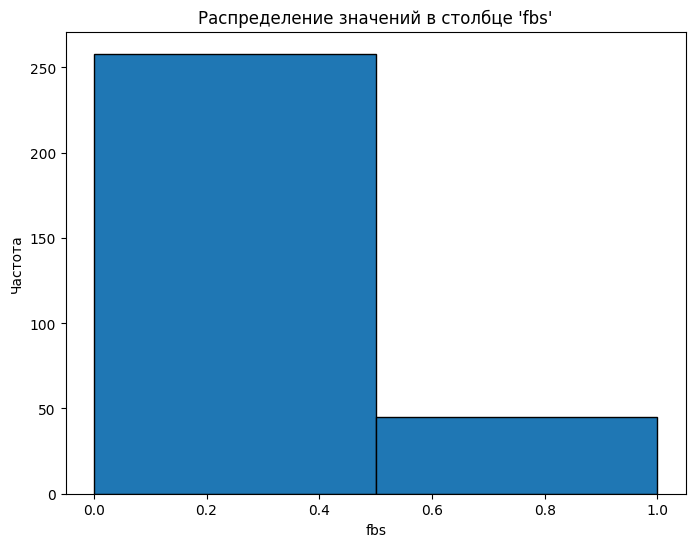

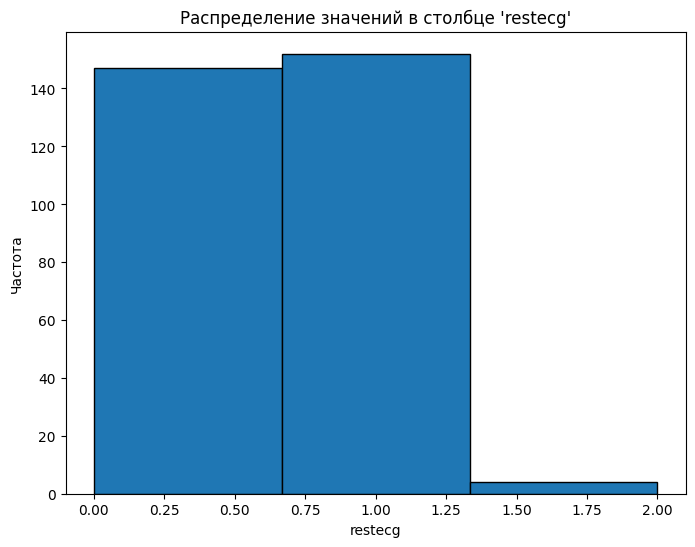

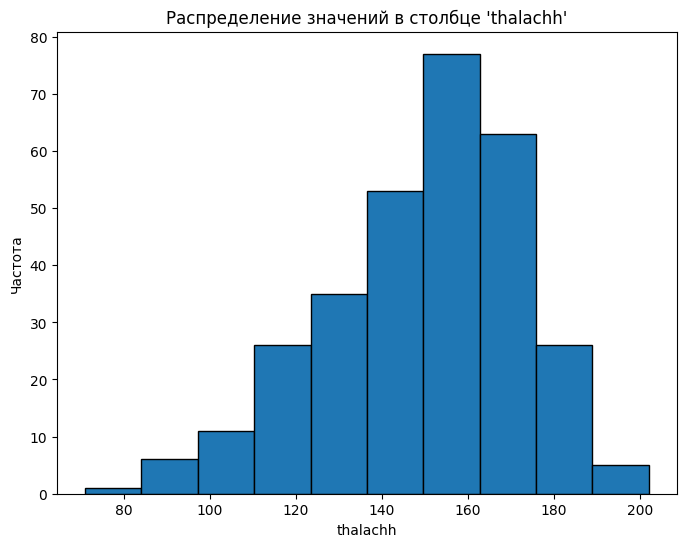

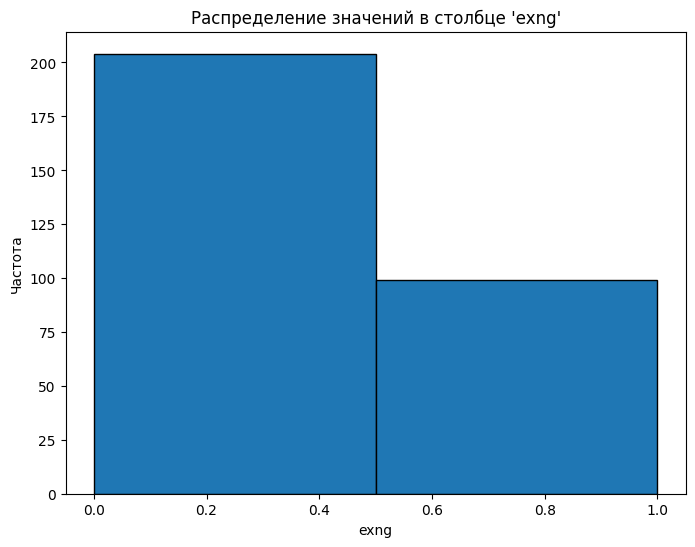

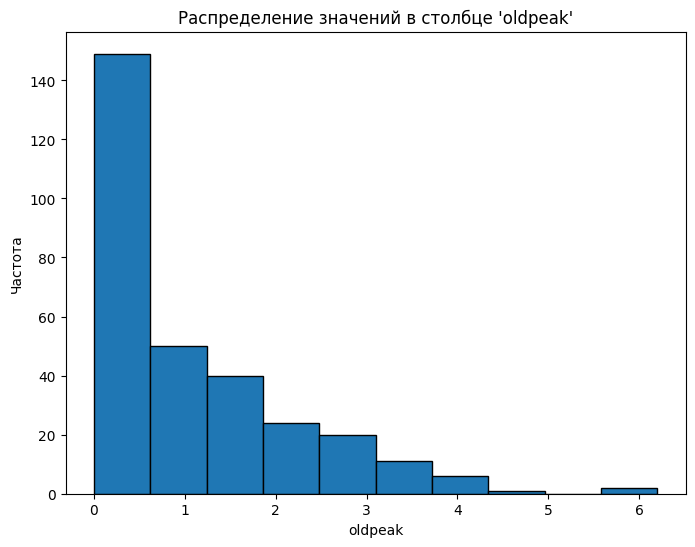

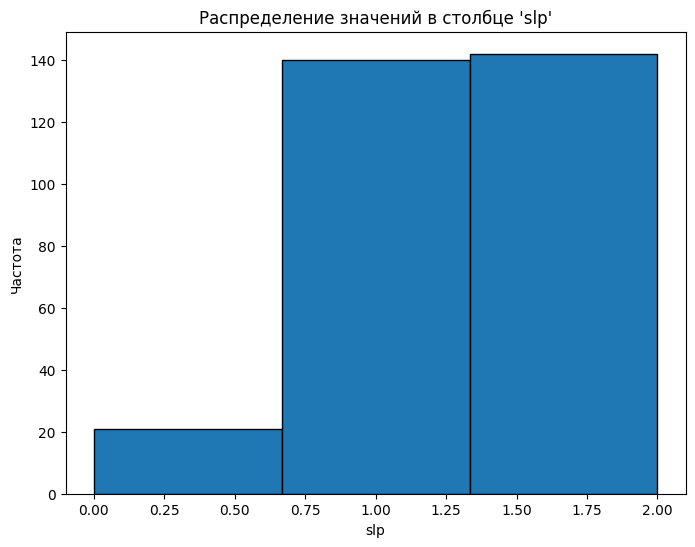

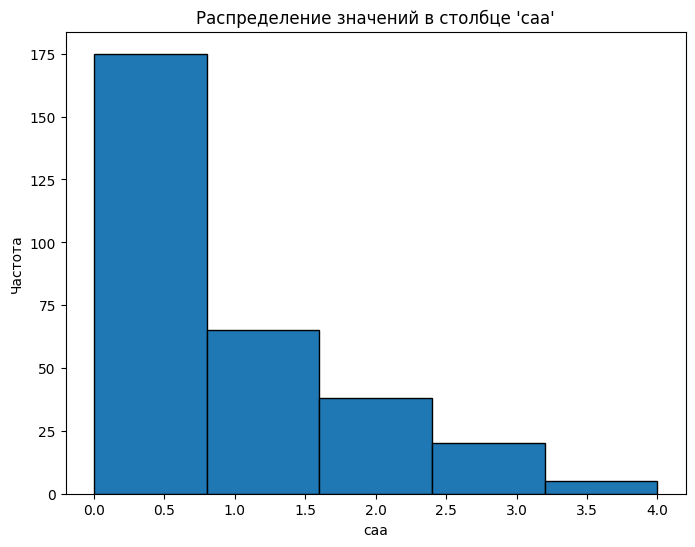

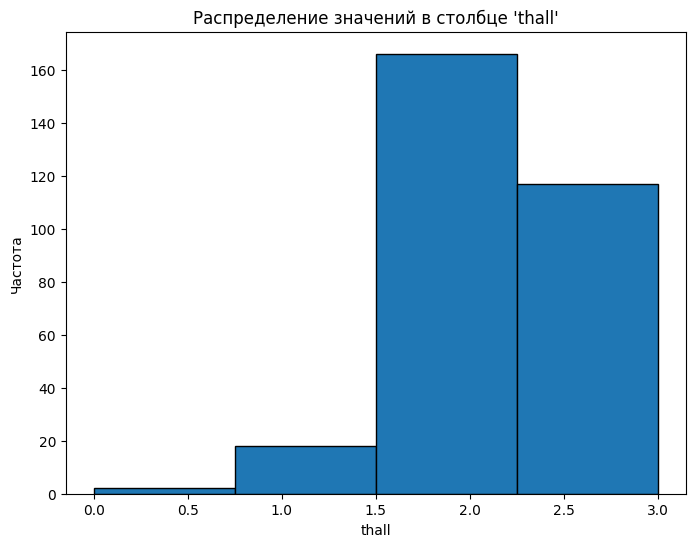

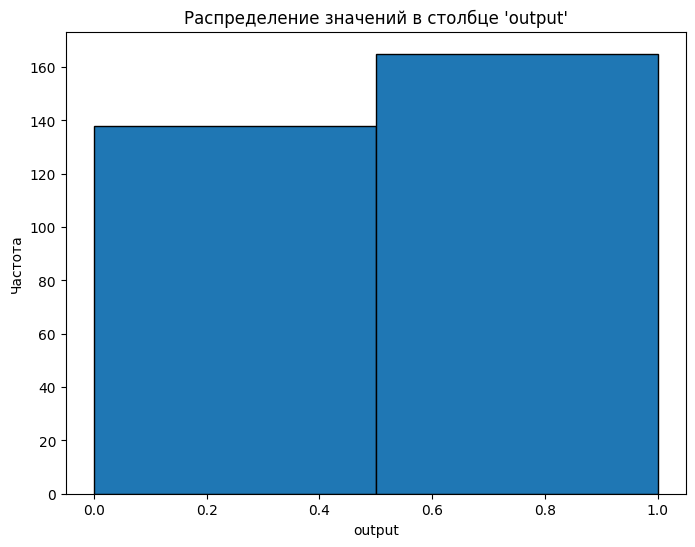

In [ ]:
# Определение количество столбцов диаграммы распределения для каждого параметра набора данных
bin_counts = {
    'age': 10,
    'sex': 2,
    'cp': 4,
    'trtbps': 10,
    'chol': 10,
    'fbs': 2,
    'restecg': 3,
    'thalachh': 10,
    'exng': 2,
    'oldpeak': 10,
    'slp': 3,
    'caa': 5,
    'thall': 4,
    'output': 2
}

#построение гистограмм
for column, bins in bin_counts.items():
    if column in df.columns and df[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 6))
        df[column].plot(kind='hist', bins=bins, edgecolor='k')
        plt.title(f"Распределение значений в столбце '{column}'")
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.show()

In [ ]:
import seaborn as sns

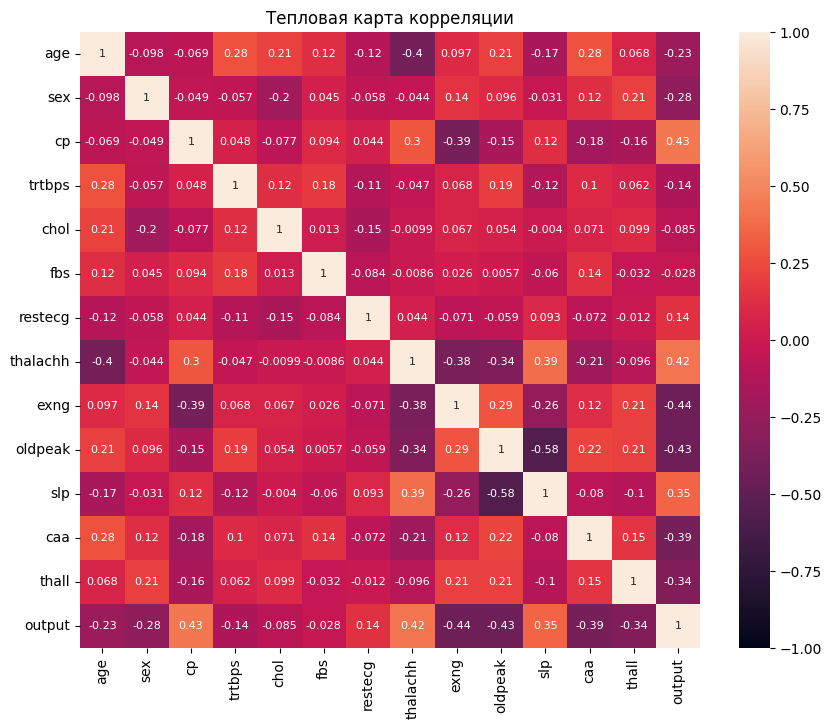

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, annot_kws={'fontsize': 8})
plt.title('Тепловая карта корреляции')
plt.show()

In [ ]:
columns_to_drop = ['chol', 'fbs']
df = df.drop(columns=columns_to_drop)
print(df)

     age  sex  cp  trtbps  restecg  thalachh  exng  oldpeak  slp  caa  thall  \
0     63    1   3     145        0       150     0      2.3    0    0      1   
1     37    1   2     130        1       187     0      3.5    0    0      2   
2     41    0   1     130        0       172     0      1.4    2    0      2   
3     56    1   1     120        1       178     0      0.8    2    0      2   
4     57    0   0     120        1       163     1      0.6    2    0      2   
..   ...  ...  ..     ...      ...       ...   ...      ...  ...  ...    ...   
298   57    0   0     140        1       123     1      0.2    1    0      3   
299   45    1   3     110        1       132     0      1.2    1    0      3   
300   68    1   0     144        1       141     0      3.4    1    2      3   
301   57    1   0     130        1       115     1      1.2    1    1      3   
302   57    0   1     130        0       174     0      0.0    1    1      2   

     output  
0         1  
1         1

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Разделение данных на признаки x и целевую переменную y
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Создание модели kNN
k = 11
knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')

In [ ]:
# Обучение модели
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [ ]:
# Предсказание вероятности классов на тестовой выборке
y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Вывод предсказанных вероятностей
print('Вывод предсказанных вероятностей на тестовой выборке:')
print(y_pred_proba)

Вывод предсказанных вероятностей на тестовой выборке:
[0.09090909 0.54545455 0.54545455 0.         0.90909091 0.90909091
 0.72727273 0.         0.         0.63636364 0.90909091 0.36363636
 0.90909091 0.         1.         0.90909091 1.         0.18181818
 0.         0.         0.63636364 0.         0.36363636 0.90909091
 1.         0.90909091 0.72727273 0.72727273 0.09090909 0.81818182
 0.         0.09090909 0.         0.         0.54545455 0.18181818
 0.54545455 0.90909091 0.72727273 0.72727273 0.81818182 0.63636364
 0.72727273 0.81818182 0.90909091 0.18181818 0.36363636 1.
 0.27272727 0.09090909 0.18181818 0.         0.90909091 1.
 0.27272727 0.         0.18181818 0.90909091 0.18181818 0.
 0.        ]


In [ ]:
# Вычисление точности модели
accuracy = accuracy_score(y_test, knn_model.predict(X_test_scaled))
print(f'Accuracy: {accuracy:.3f}')

Accuracy: 0.902


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
#кросс-валидация
neighbors = list(range(1, 20))
mean_accuracy = []
for k in neighbors:
    knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')
    scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=10)
    mean_accuracy.append(np.mean(scores))
best_k = neighbors[np.argmax(mean_accuracy)]
print(f"Лучшее значение k: {best_k}")

Лучшее значение k: 4


In [ ]:
k = 11
knn_model = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform')
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

In [ ]:
# Матрица путаницы
y_pred = knn_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print('Матрица путаницы:')
print(cm)

Матрица путаницы:
[[26  3]
 [ 3 29]]


In [ ]:
# Отчет о классификации
report = classification_report(y_test, y_pred)
print('Отчет о классификации:')
print(report)

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [ ]:
# ROC-кривая и AUC-ROC
y_pred_proba = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

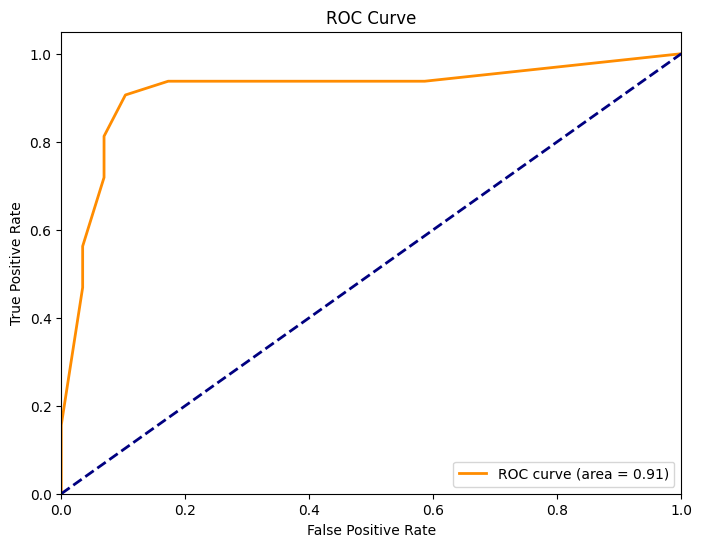

In [ ]:
# Построение ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()